## Lending Club Case study.

### Problem Statement:
Consumer finance company which specializes in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default so company can utilize this knowledge for its portfolio and risk assessment. 


### Objective:
 Perform Exploratory Data Analysis to analyze loan dataset of the company and identify variables which are strong indicators of defaulting loan.


### About the dataset

Dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011 by the company. Lets explore this data and collect insights about risky loans.



### Importing libraries in Python

In [2]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

### Data Loading, Inspection & clean up

In [3]:
#Importing the data
df_loan = pd.read_csv("C:\\Work\\Data\\TP\\prg\\loan.csv",index_col=0, low_memory=False)
df_loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df_loan.shape

(39717, 110)

### Checking Missing Values

In [5]:
df_loan.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [6]:
df_loan.dropna(axis=1, how='all',inplace=True)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

### Check invalid values

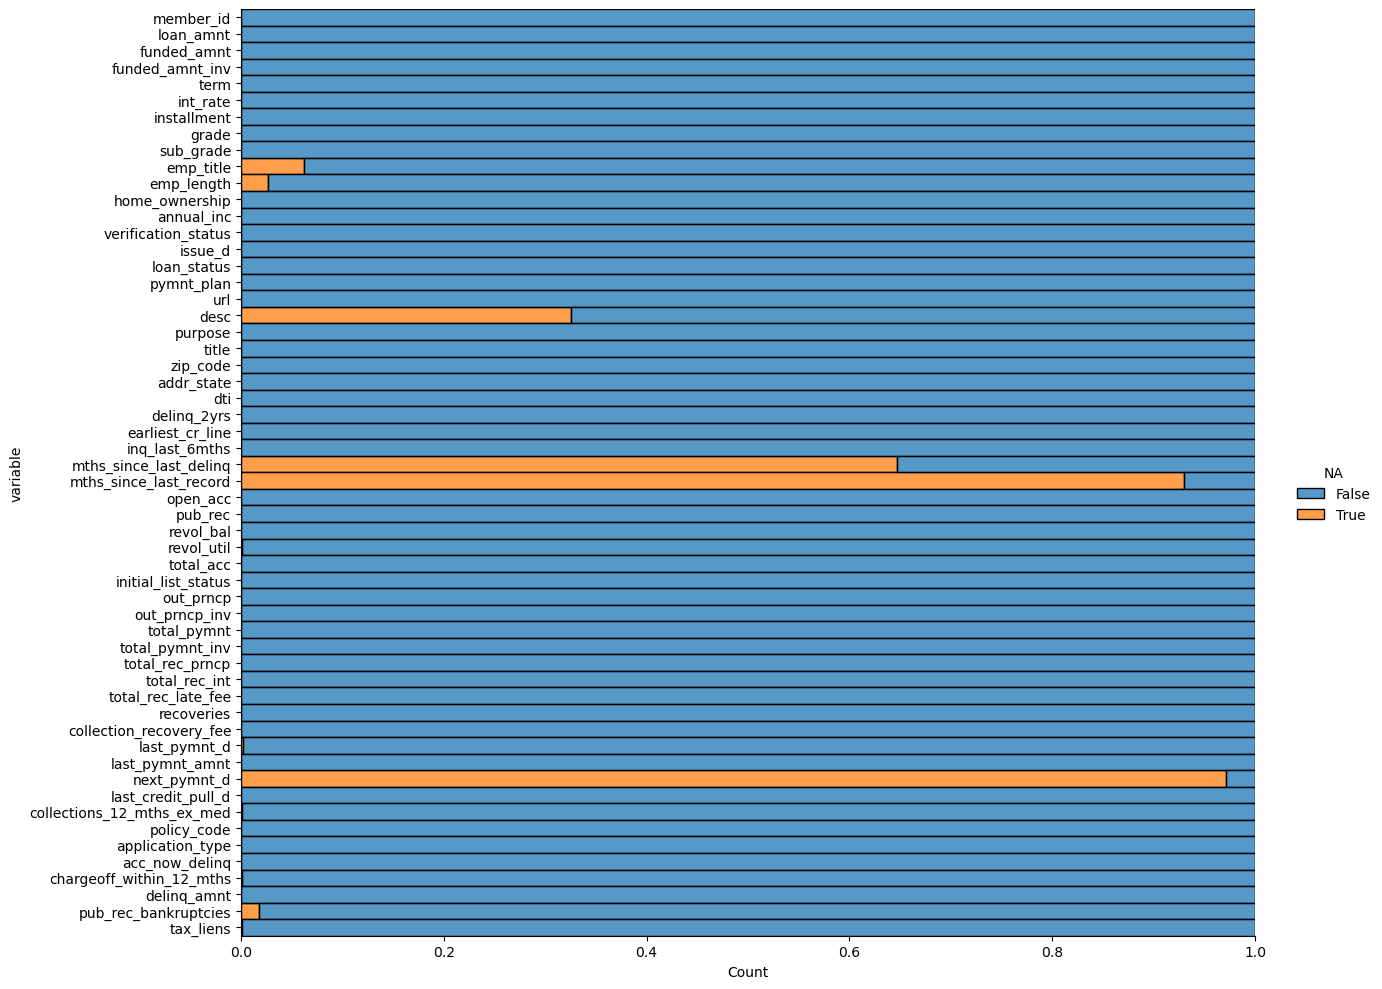

In [7]:
sns.displot(
    data=df_loan.isna().melt(value_name="NA"),
    y="variable",
    hue="NA",
    multiple="fill",
    height=10,
    aspect=1.3
)
plt.show()

### Data set finalizing:
- Remove columns which have >80% of missing values ( from above we can say mths_since_last_delinq, mths_since_last_record, next_pymnt_d can be removed)
- Columns with single values also doesnt contribute, remove them.


### Based on meta data given in data dictionary:
    <b> Loan attributes:</b>
    1. `loan amnt`: (The listed amount of the loan applied for by the borrower.)
    2. `term`: (The number of payments on the loan. Values are in months and can be either 36 or 60.)
    3. `int_rate` :(Interest Rate on the loan)
    4. `installment` : (The monthly payment owed by the borrower)
    5. `issue_d`: (The month which the loan was funded)
    6. `purpose` : (A category provided by the borrower for the loan request.)
    7. `loan_status`: (Current status of the loan)
  
  
    <b> Consumer attributes:</b>
        <b> Consumer details:</b>
    1. `emp_length`: (Employment length in years.)
    2. `home_ownership` :(The home ownership status provided by the borrower)
    3. `annual_inc` : (The self-reported annual income provided by the borrower)
        
         <b> Consumer credit details:</b>
    1. `grade`: (LC assigned loan grade.)
    2. `sub_grade` :(LC assigned loan subgrade)
    3. `verification_status` : (Indicates if income was verified by LC, not verified, or if the income source was verified)
    4. `dti`: (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations)
    5. `delinq_2yrs`: (The number of 30+ days past-due incidences of delinquency in borrower's credit file for past 2 years).
    6. `earliest_cr_line`: (The month the borrower's earliest reported credit line was opened)
    7. `pub_rec`: (Number of derogatory public records)`
    8. `open_acc`: (The number of open credit lines in the borrower's credit file.)
    9. `revol_bal`: (Total credit revolving balance)
    10. `revol_util`: (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.)
    11. `total_acc`: (The total number of credit lines currently in the borrower's credit file)
    12. `pub_rec_bankruptcies`: (Number of public record bankruptcies)
    
    
    Keep only above and remove all other columns.
     



In [8]:
## Remove columns which have >80% of missing values
df_loan.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'], axis=1,inplace=True)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [9]:
## Remove columns with single values
df_loan.drop(['pymnt_plan','policy_code','application_type','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1,inplace=True)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [10]:
df_loan.drop(['member_id','funded_amnt','funded_amnt_inv','emp_title','url', 'desc','title','zip_code','addr_state','inq_last_6mths','initial_list_status','out_prncp','out_prncp_inv','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','collections_12_mths_ex_med','last_credit_pull_d','acc_now_delinq'], axis=1,inplace=True)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  earliest_cr_l

In [11]:
### Check column datatype and correct them

In [12]:
df_loan['int_rate']=df_loan.int_rate.str.strip('%').astype(float)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  earliest_cr_l

In [13]:
df_loan['emp_length']=df_loan.emp_length.str.strip('years')
df_loan['emp_length']=df_loan.emp_length.str.strip('+ <')
df_loan['emp_length']=df_loan['emp_length'].astype(float)
df_loan['emp_length']

id
1077501    10.0
1077430     1.0
1077175    10.0
1076863    10.0
1075358     1.0
           ... 
92187       4.0
90665       3.0
90395       1.0
90376       1.0
87023       1.0
Name: emp_length, Length: 39717, dtype: float64

In [14]:
df_issue_d= df_loan['issue_d'].str.partition('-',True)
df_loan["issued_month"]= df_issue_d[0]
df_loan["issued_year"]= df_issue_d[2]
df_loan.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,36 months,10.65,162.87,B,B2,10.0,RENT,24000.00,Verified,...,0,Jan-85,3,0,13648,83.70%,9,0.0,Dec,11
1077430,2500,60 months,15.27,59.83,C,C4,1.0,RENT,30000.00,Source Verified,...,0,Apr-99,3,0,1687,9.40%,4,0.0,Dec,11
1077175,2400,36 months,15.96,84.33,C,C5,10.0,RENT,12252.00,Not Verified,...,0,Nov-01,2,0,2956,98.50%,10,0.0,Dec,11
1076863,10000,36 months,13.49,339.31,C,C1,10.0,RENT,49200.00,Source Verified,...,0,Feb-96,10,0,5598,21%,37,0.0,Dec,11
1075358,3000,60 months,12.69,67.79,B,B5,1.0,RENT,80000.00,Source Verified,...,0,Jan-96,15,0,27783,53.90%,38,0.0,Dec,11
1075269,5000,36 months,7.90,156.46,A,A4,3.0,RENT,36000.00,Source Verified,...,0,Nov-04,9,0,7963,28.30%,12,0.0,Dec,11
1069639,7000,60 months,15.96,170.08,C,C5,8.0,RENT,47004.00,Not Verified,...,0,Jul-05,7,0,17726,85.60%,11,0.0,Dec,11
1072053,3000,36 months,18.64,109.43,E,E1,9.0,RENT,48000.00,Source Verified,...,0,Jan-07,4,0,8221,87.50%,4,0.0,Dec,11
1071795,5600,60 months,21.28,152.39,F,F2,4.0,OWN,40000.00,Source Verified,...,0,Apr-04,11,0,5210,32.60%,13,0.0,Dec,11


In [15]:
df_Cr= df_loan['earliest_cr_line'].str.partition('-',True)
df_loan["Cr_month"]= df_Cr[0]
df_loan["Cr_year"]= df_Cr[2]
df_loan.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issued_month,issued_year,Cr_month,Cr_year
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,36 months,10.65,162.87,B,B2,10.0,RENT,24000.00,Verified,...,3,0,13648,83.70%,9,0.0,Dec,11,Jan,85
1077430,2500,60 months,15.27,59.83,C,C4,1.0,RENT,30000.00,Source Verified,...,3,0,1687,9.40%,4,0.0,Dec,11,Apr,99
1077175,2400,36 months,15.96,84.33,C,C5,10.0,RENT,12252.00,Not Verified,...,2,0,2956,98.50%,10,0.0,Dec,11,Nov,01
1076863,10000,36 months,13.49,339.31,C,C1,10.0,RENT,49200.00,Source Verified,...,10,0,5598,21%,37,0.0,Dec,11,Feb,96
1075358,3000,60 months,12.69,67.79,B,B5,1.0,RENT,80000.00,Source Verified,...,15,0,27783,53.90%,38,0.0,Dec,11,Jan,96
1075269,5000,36 months,7.90,156.46,A,A4,3.0,RENT,36000.00,Source Verified,...,9,0,7963,28.30%,12,0.0,Dec,11,Nov,04
1069639,7000,60 months,15.96,170.08,C,C5,8.0,RENT,47004.00,Not Verified,...,7,0,17726,85.60%,11,0.0,Dec,11,Jul,05
1072053,3000,36 months,18.64,109.43,E,E1,9.0,RENT,48000.00,Source Verified,...,4,0,8221,87.50%,4,0.0,Dec,11,Jan,07
1071795,5600,60 months,21.28,152.39,F,F2,4.0,OWN,40000.00,Source Verified,...,11,0,5210,32.60%,13,0.0,Dec,11,Apr,04


In [16]:
### Remove rows related to loan status "Current" as these finally fall into fully paid or charged off.

In [17]:
index_names = df_loan[ df_loan['loan_status'] == "Current" ].index 
df_loan.drop(index_names, inplace = True)
df_loan.shape

(38577, 26)

## Our data set is ready to explore.

<h1>Univariate Analysis </h1>

In [18]:
# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

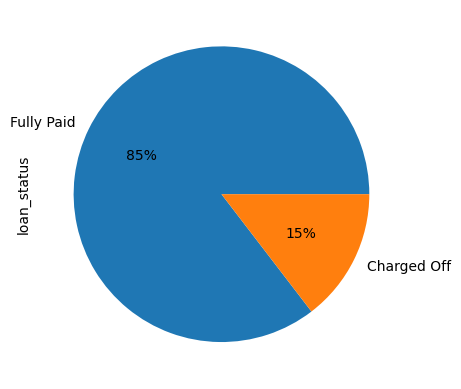

In [19]:
df_loan.loan_status.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

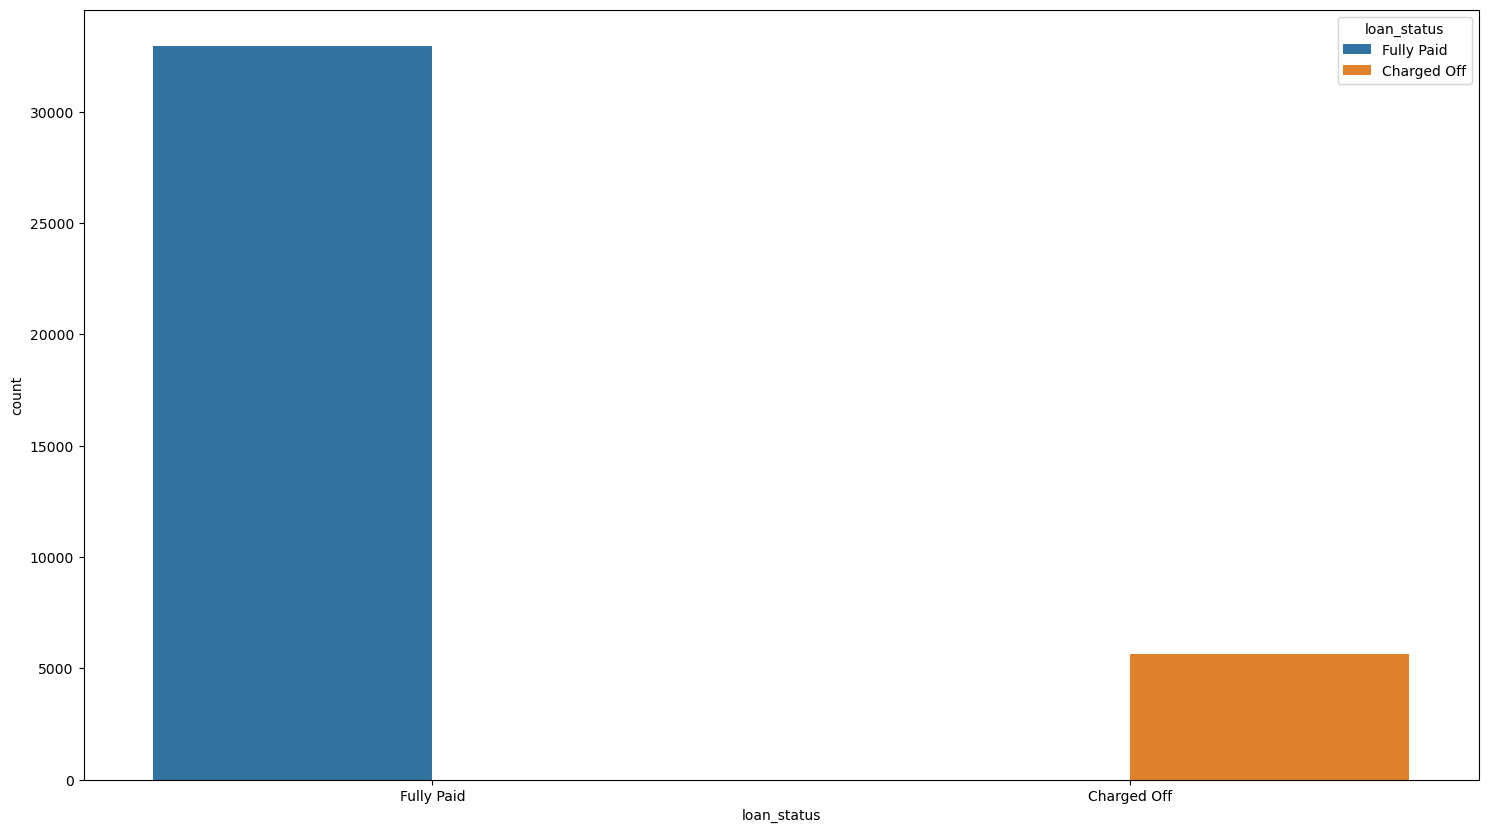

In [20]:
plt.figure(figsize=(18,10))
sns.countplot(data=df_loan, x="loan_status", hue='loan_status')
plt.show()

<Axes: xlabel='loan_amnt', ylabel='Density'>

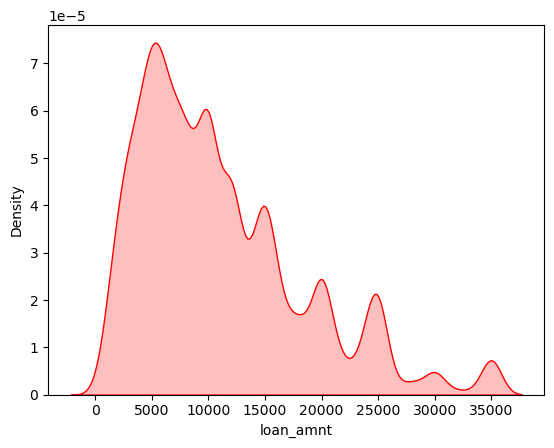

In [21]:
sns.kdeplot(x='loan_amnt', data=df_loan, fill = True, color = "Red")

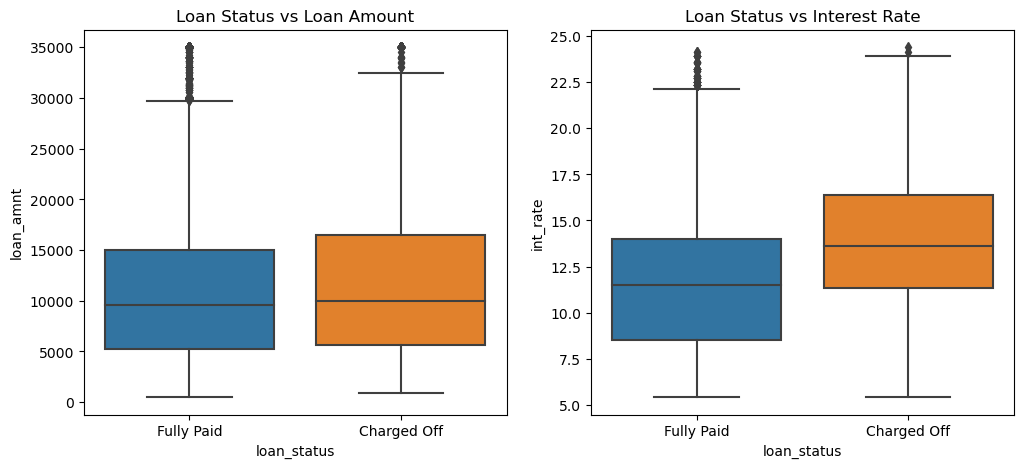

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y=df_loan.loan_amnt, data=df_loan)
plt.title('Loan Status vs Loan Amount')

plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y=df_loan.int_rate, data=df_loan)
plt.title('Loan Status vs Interest Rate')
plt.show()

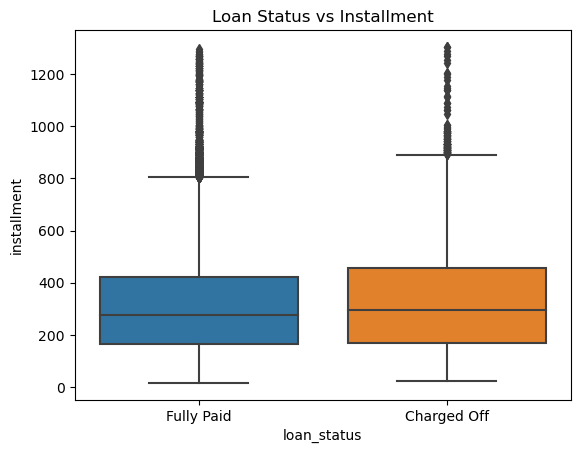

In [23]:
sns.boxplot(x='loan_status', y=df_loan.installment, data=df_loan)
plt.title('Loan Status vs Installment')
plt.show()

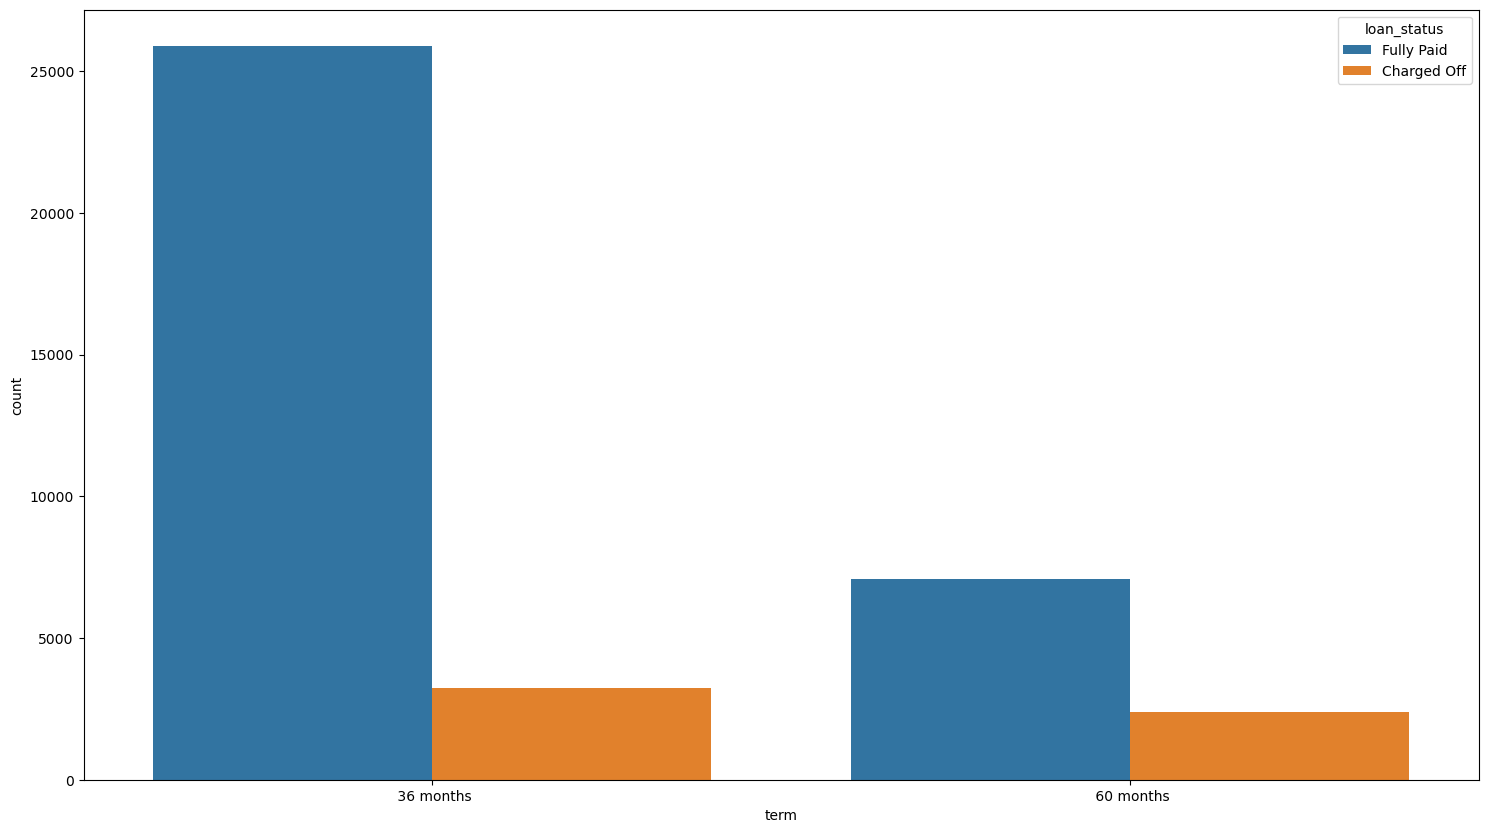

In [24]:
plt.figure(figsize=(18,10))
sns.countplot(data=df_loan, x="term", hue="loan_status")
plt.show()


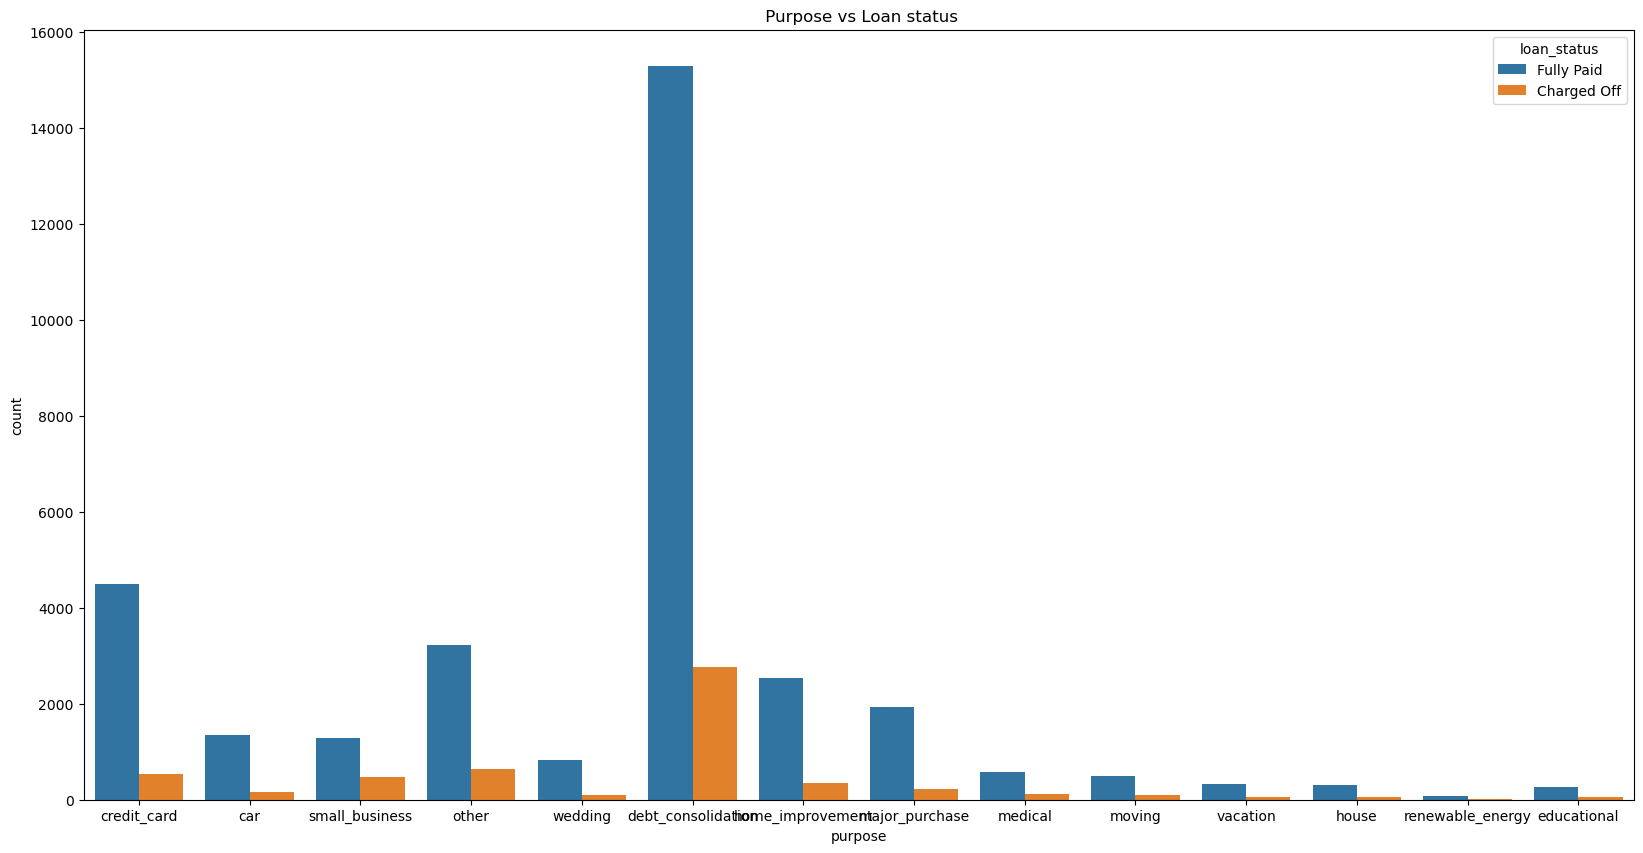

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose', data=df_loan, hue='loan_status')
plt.title(" Purpose vs Loan status")
plt.show()


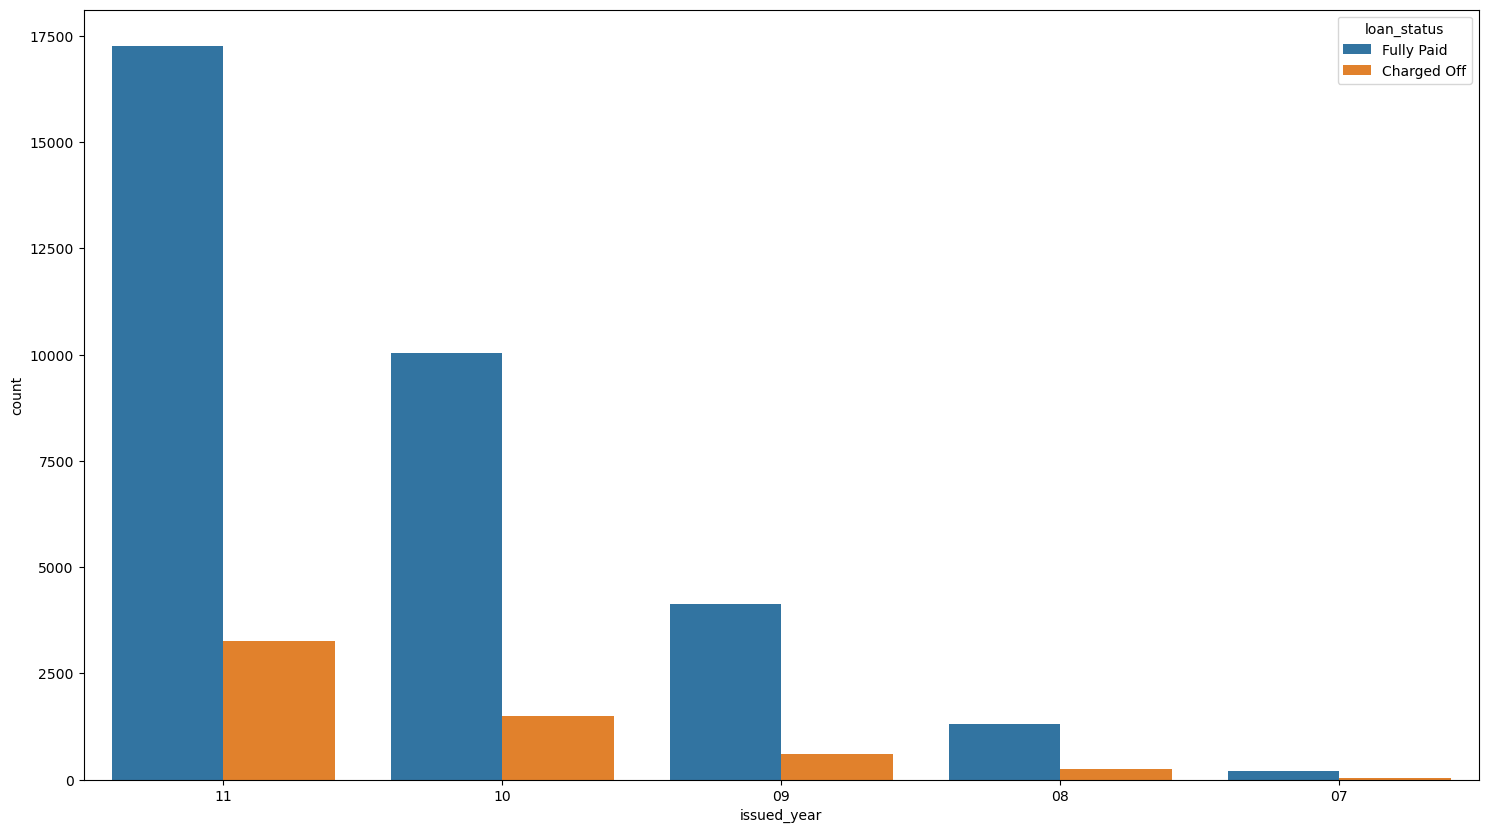

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(data=df_loan, x="issued_year", hue="loan_status")
plt.show()

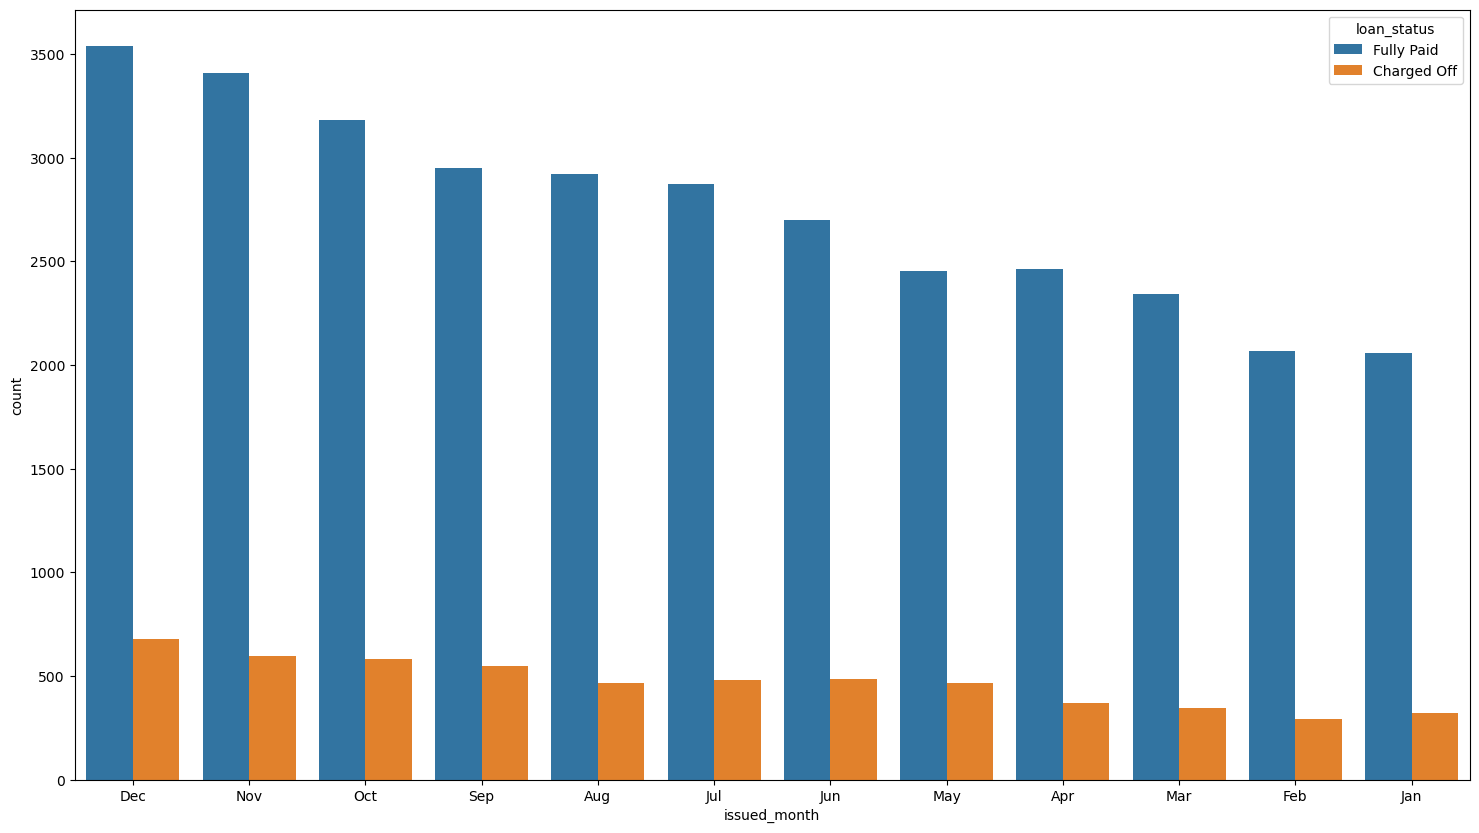

In [26]:
plt.figure(figsize=(18,10))
sns.countplot(data=df_loan, x="issued_month", hue="loan_status")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(data=df_loan, x="purpose", hue="loan_status")
plt.show()

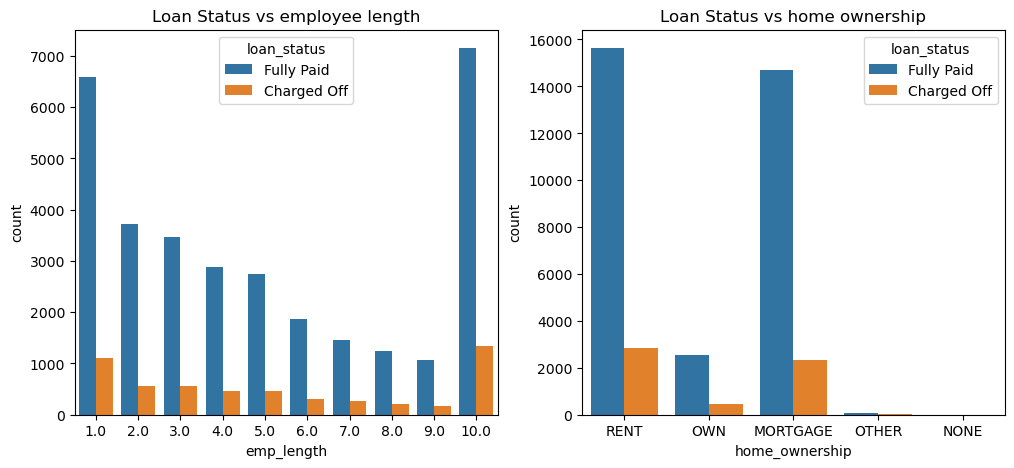

In [49]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='emp_length', data=df_loan, hue='loan_status')
plt.title('Loan Status vs employee length')

plt.subplot(1, 2, 2)
sns.countplot(x='home_ownership', data=df_loan, hue='loan_status')
plt.title('Loan Status vs home ownership')
plt.show()

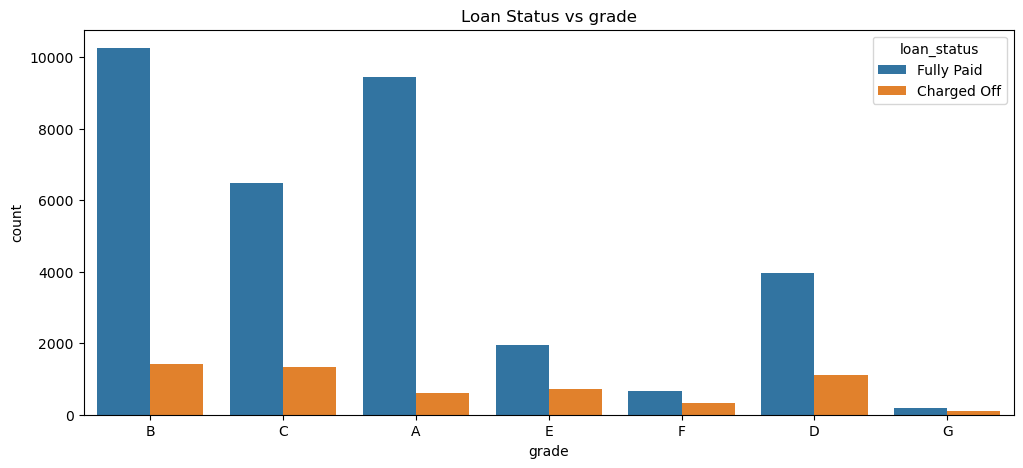

In [62]:
plt.figure(figsize=(12, 5))
sns.countplot(x='grade', data=df_loan, hue='loan_status')
plt.title('Loan Status vs grade')
plt.show()



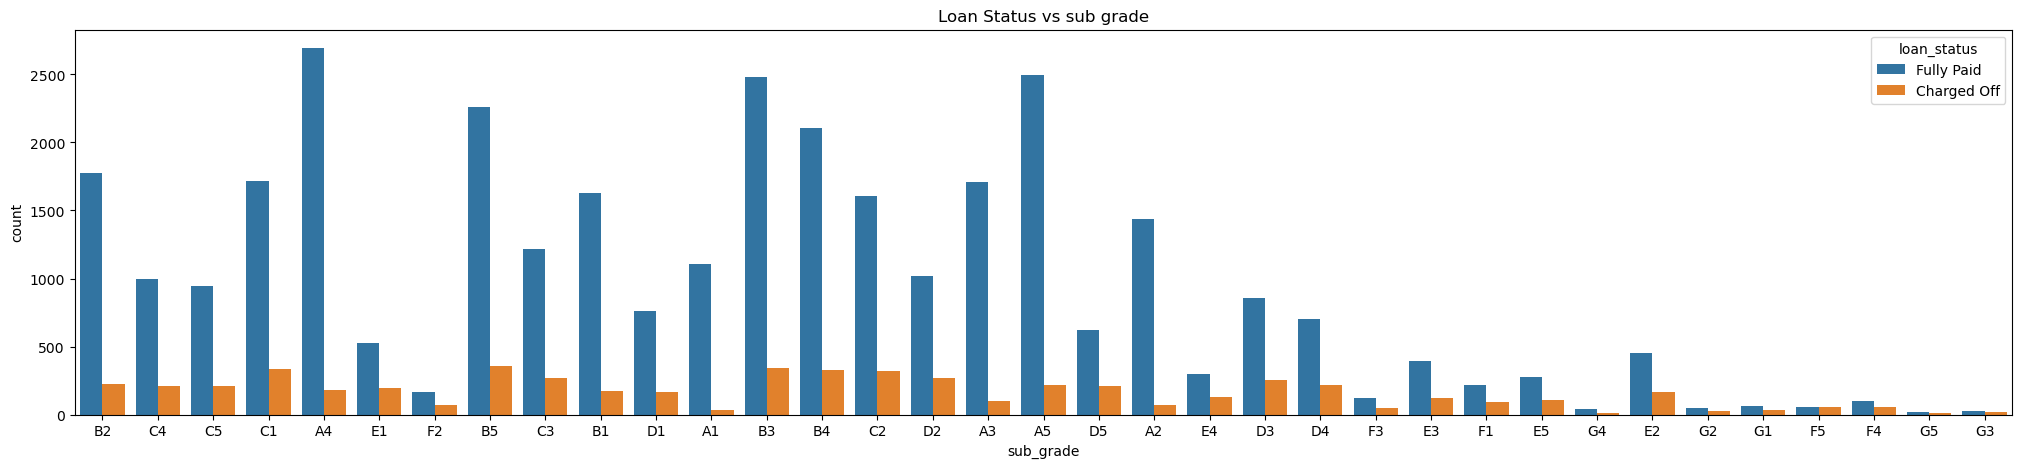

In [64]:
plt.figure(figsize=(25, 5))
sns.countplot(x='sub_grade', data=df_loan, hue='loan_status')
plt.title('Loan Status vs sub grade')
plt.show()

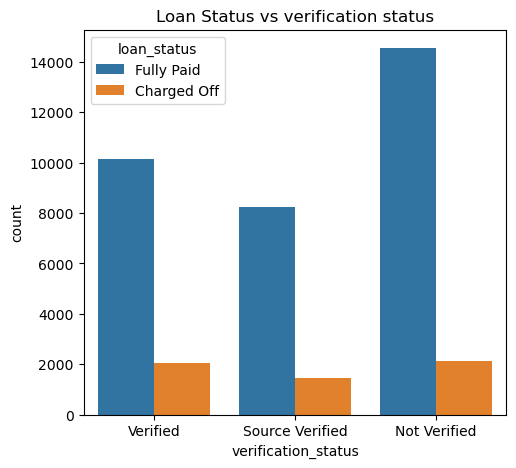

In [65]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='verification_status', data=df_loan, hue='loan_status')
plt.title('Loan Status vs verification status')
plt.show()

<h1> Bivariate Analysis </h1>


C:\Users\305013432\AppData\Local\Temp\ipykernel_25684\1058128855.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

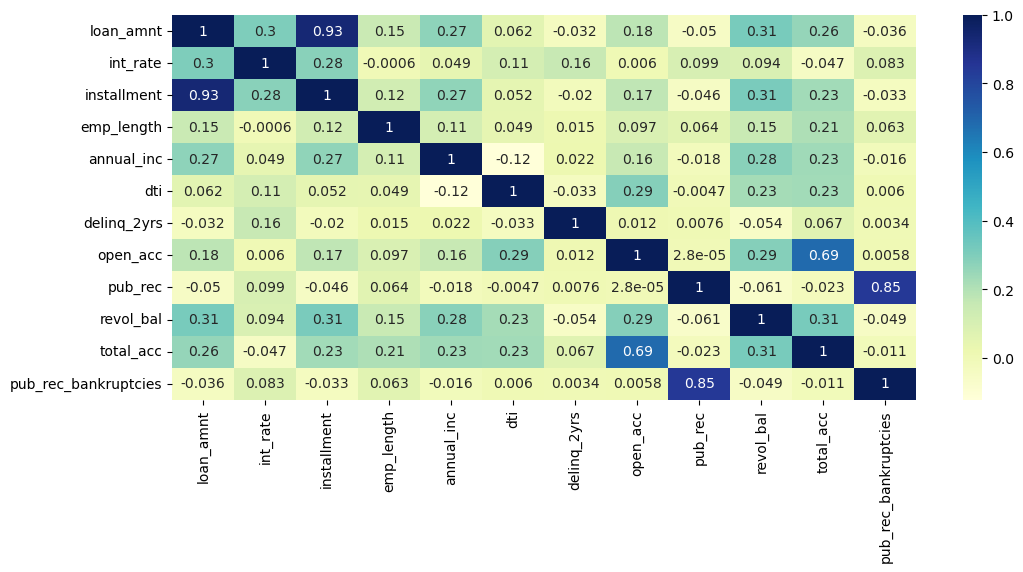

In [27]:
plt.figure(figsize=(12,5))
sns.heatmap(df_loan.corr(), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Purpose vs Loan Amount')

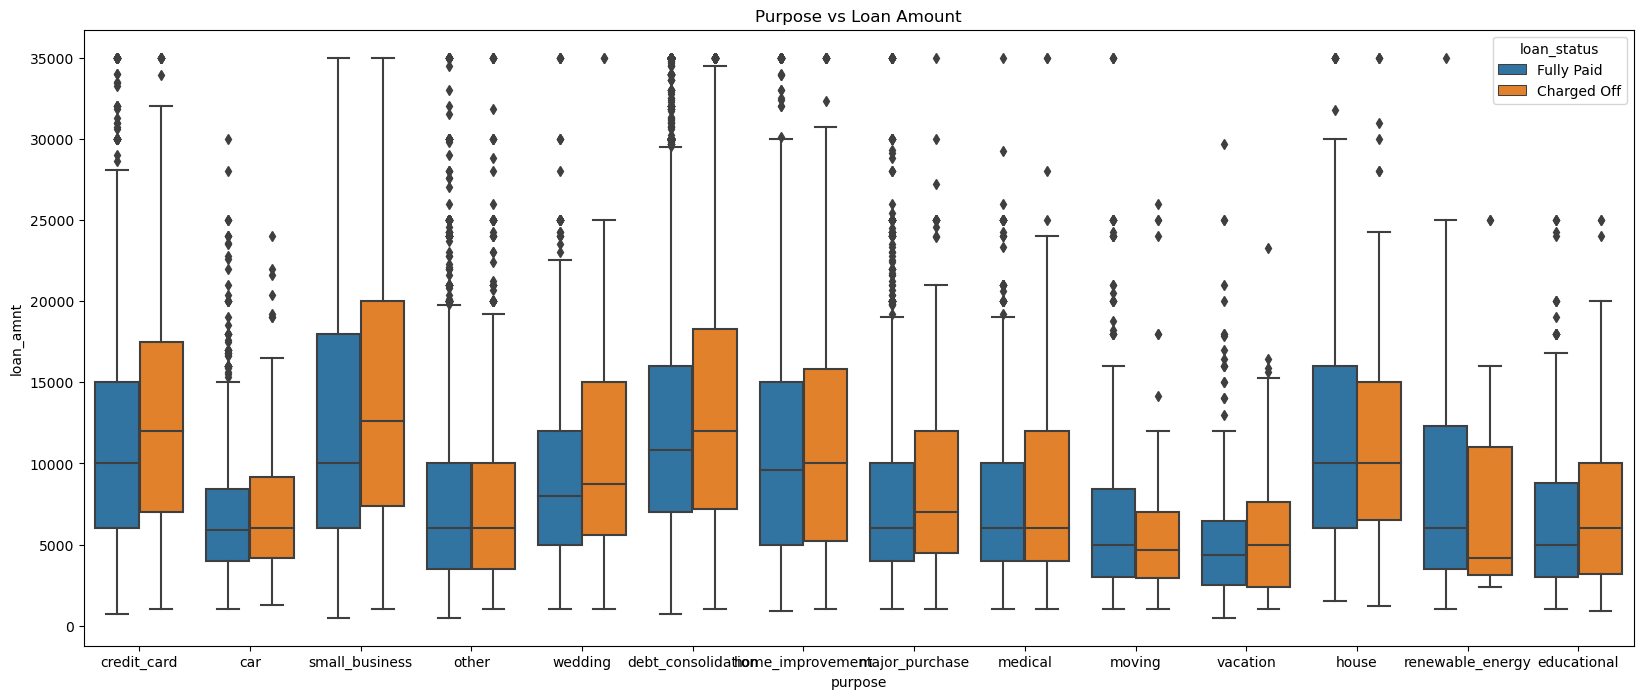

In [39]:
plt.figure(figsize=(20,8))
sns.boxplot(x='purpose', y=df_loan.loan_amnt, hue="loan_status", data=df_loan)
plt.title('Purpose vs Loan Amount')

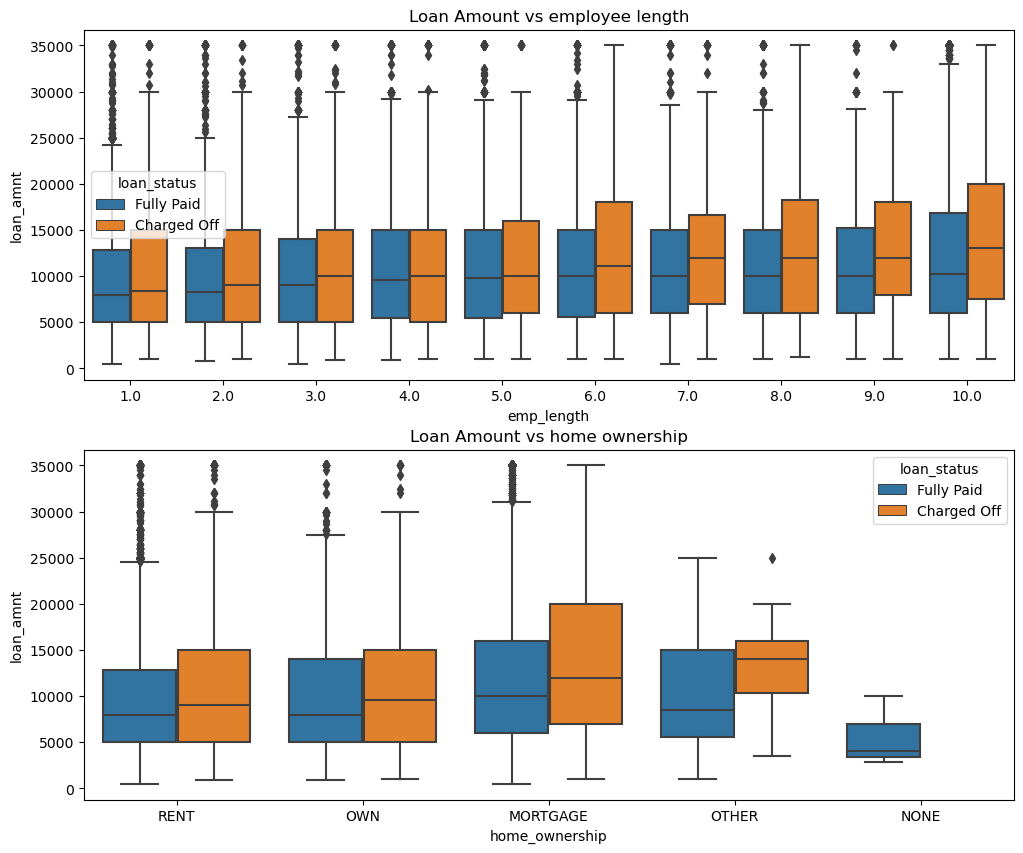

In [50]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x='emp_length',  y=df_loan.loan_amnt, data=df_loan, hue='loan_status')
plt.title('Loan Amount vs employee length')

plt.subplot(2, 1, 2)
sns.boxplot(x='home_ownership',  y=df_loan.loan_amnt, data=df_loan, hue='loan_status')
plt.title('Loan Amount vs home ownership')
plt.show()

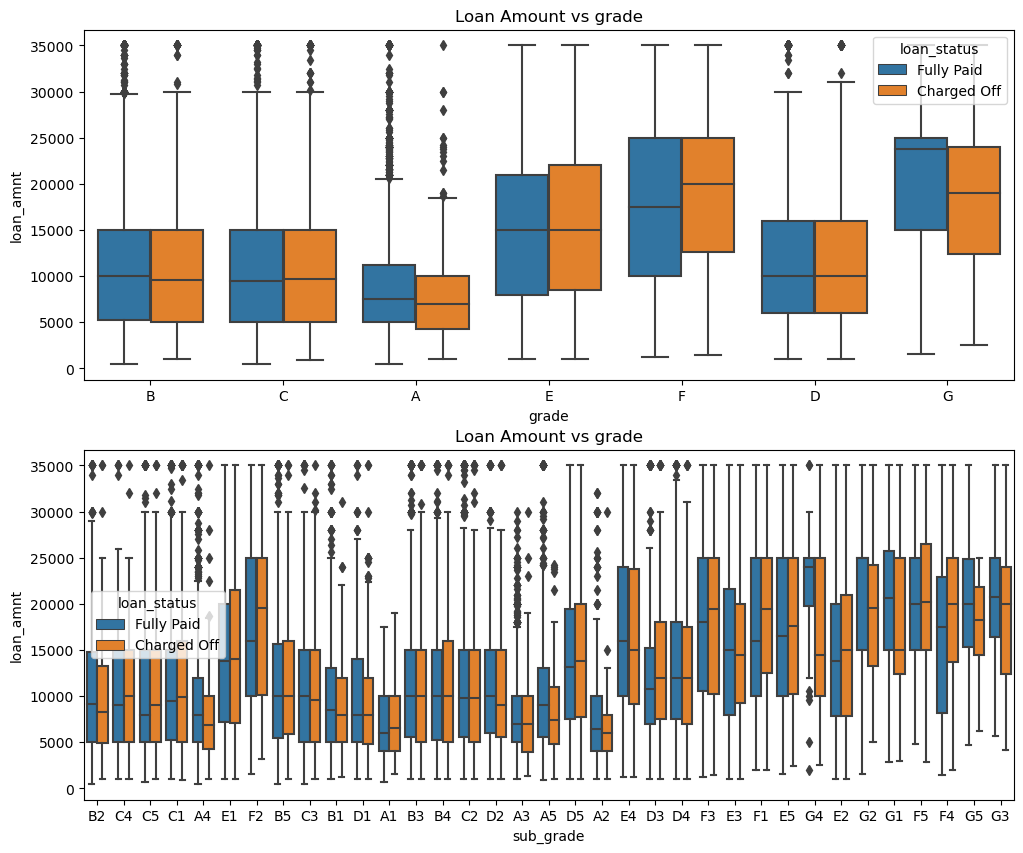

In [63]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x='grade',  y=df_loan.loan_amnt, data=df_loan, hue='loan_status')
plt.title('Loan Amount vs grade')

plt.subplot(2, 1, 2)
sns.boxplot(x='sub_grade',  y=df_loan.loan_amnt, data=df_loan, hue='loan_status')
plt.title('Loan Amount vs grade')
plt.show()

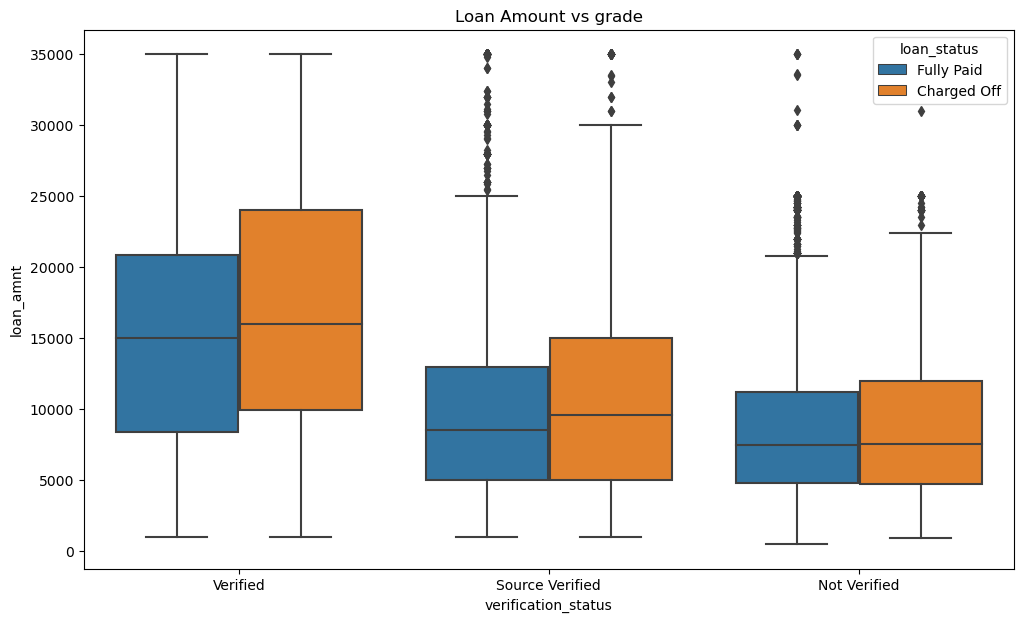

In [67]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='verification_status',  y=df_loan.loan_amnt, data=df_loan, hue='loan_status')
plt.title('Loan Amount vs grade')
plt.show()

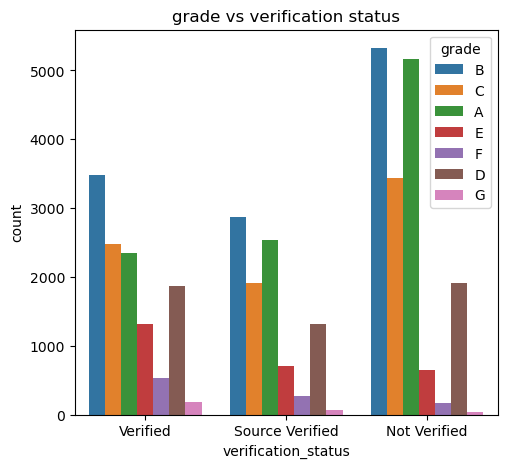

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='verification_status', data=df_loan, hue='grade')
plt.title('grade vs verification status')
plt.show()

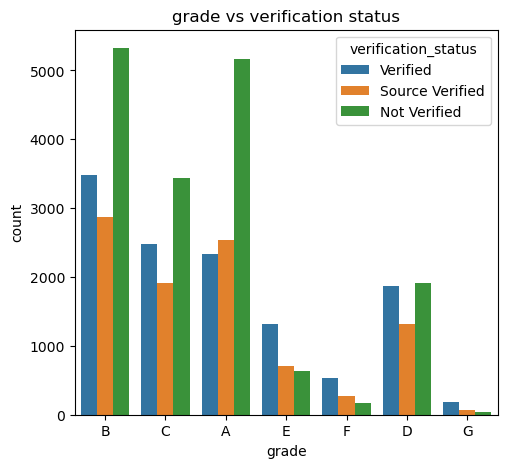

In [73]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='grade', data=df_loan, hue='verification_status')
plt.title('grade vs verification status')
plt.show()

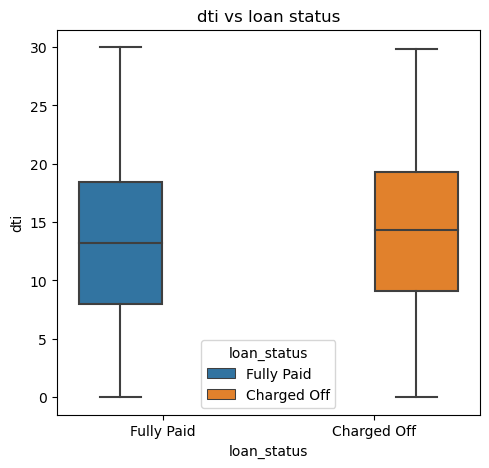

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y=df_loan.dti, data=df_loan, hue='loan_status')
plt.title('dti vs loan status')
plt.show()

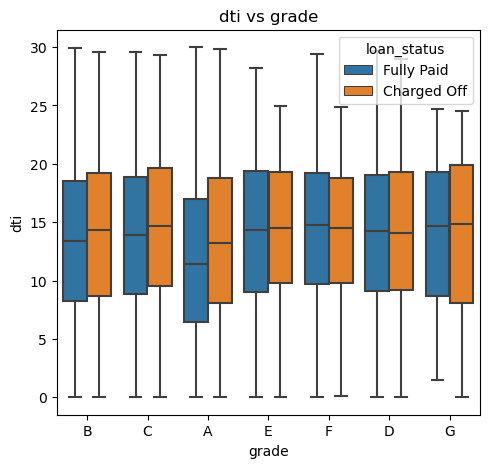

In [80]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='grade', y=df_loan.dti, data=df_loan, hue='loan_status')
plt.title('dti vs grade')
plt.show()

In [70]:
# define the bin edges
bins = [0, 20, 40, 60, 80]

# bin the age column
df['age_bin'] = pd.cut(df['age'], bins)

NameError: name 'df' is not defined